In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy

from sklearn.gaussian_process.kernels import ConstantKernel, RBF, WhiteKernel, Matern
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

from scipy.stats import norm
from scipy.spatial.distance import cdist
import seaborn as sns

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
plt.style.use('default')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

def acquisition_EI(X, Ysamples, model, xi=0.01):

    best = np.max(Ysamples)
    mu, std = model.predict(X,return_std=True)
    std = std.reshape(-1,1)
    imp = mu - best-xi
    Z = imp / std
    ei = imp * norm.cdf(Z) + std * norm.pdf(Z)
    ei[std == 0.0] = 0.0

    return ei

NameError: ignored

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/BO_printing/BO_printing/Composition optimization-0924.xlsx')
df = df[['Ag', 'Se', 'S', 'Cu', 'Te', 't/um', 'Power factor']]

In [ ]:
newdata = {'Ag':[1.9,1.9,1.9,1.9], 'Se':[1.3,1.3,1.3,1.3], 'S':[0.05,0.05,0.05,0.05], 'Cu':[0.15,0.15,0.15,0.15], 'Te':[0.01,0.01,0.01,0.01], 't/um':[190, 140, 107, 112], 'Power factor':[1460, 1896, 1710, 1957]}
newdata2 = {'Ag':[1.9,1.9,1.9,1.9], 'Se':[1.1,1.1,1.1,1.1], 'S':[0.02,0.02,0.02,0.02], 'Cu':[0.13,0.13,0.13,0.13], 'Te':[0,0,0,0], 't/um':[100,41,37,173], 'Power factor':[2351,2068,1621,1356]}
newdata3 = {'Ag':[1.95,1.95,1.95], 'Se':[1.05,1.05,1.05], 'S':[0.01,0.01,0.01], 'Cu':[0.01,0.01,0.01,], 'Te':[0,0,0], 't/um':[63,75,84], 'Power factor':[1607,1482,1296]}
newdata4 = {'Ag':[1.9,1.9], 'Se':[1.35,1.35], 'S':[0,0], 'Cu':[0.13,0.13,], 'Te':[0.001,0.001], 't/um':[143,73], 'Power factor':[1604,1819]}

newdata5 = {'Ag':[1.9,1.9], 'Se':[1.15,1.15], 'S':[0.005,0.005], 'Cu':[0.14,0.14,], 'Te':[0.00,0.00], 't/um':[111,109], 'Power factor':[1871,1769]}
newdata6 = {'Ag':[1.9,1.9], 'Se':[1.1,1.1], 'S':[0.005,0.005], 'Cu':[0.1,0.1,], 'Te':[0.00,0.00], 't/um':[148,121], 'Power factor':[1263,1524]}

newdata7 = {'Ag':[1.9,1.9,1.9,1.9,1.9], 'Se':[1.1,1.1,1.1,1.1,1.1], 'S':[0.002,0.002,0.002,0.002,0.002], 'Cu':[0.14,0.14,0.14,0.14,0.14], 'Te':[0.00,0.00,0,0,0], 't/um':[82.4,68.9,121,74.2,82.1], 'Power factor':[2278.9,2243.9,1438.47,2510.8,2295]}

newdata8 = {'Ag':[1.9,1.9,1.9], 'Se':[1.2,1.2,1.2,], 'S':[0.001,0.001,0.001,], 'Cu':[0.24,0.24,0.24,], 'Te':[0.00,0.00,0], 't/um':[60,85,88,], 'Power factor':[1165,929,860]}

newdata9 = {'Ag':[1.9,], 'Se':[1.1], 'S':[0.005], 'Cu':[0.08], 'Te':[0], 't/um':[80], 'Power factor':[1407]}
newdata10 = {'Ag':[1.85], 'Se':[1.1], 'S':[0.005], 'Cu':[0.19], 'Te':[0], 't/um':[80], 'Power factor':[1162]}

avgdata = {'Ag':[1.9,1.9,1.95], 'Se':[1.3,1.1,1.05], 'S':[0.05,0.02,0.01], 'Cu':[0.15,0.13,0.01,], 'Te':[0.01,0,0], 't/um':[137,60,74], 'Power factor':[1755,2013,1461]}

newdatadf = pd.DataFrame(newdata)
newdatadf2 = pd.DataFrame(newdata2)
newdatadf3 = pd.DataFrame(newdata3)
newdatadf4 = pd.DataFrame(newdata4)
newdatadf5 = pd.DataFrame(newdata5)
newdatadf6 = pd.DataFrame(newdata6)
newdatadf7 = pd.DataFrame(newdata7)
newdatadf8 = pd.DataFrame(newdata8)
newdatadf9 = pd.DataFrame(newdata9)
newdatadf10 = pd.DataFrame(newdata10)

#avgdatadf = pd.DataFrame(avgdata)

df = df.append([newdatadf, newdatadf2, newdatadf3, newdatadf4 , newdatadf5, newdatadf6, newdatadf7, newdatadf8, newdatadf9, newdatadf10])

In [ ]:
#df = df.drop([22,28])
df = df.drop([22])

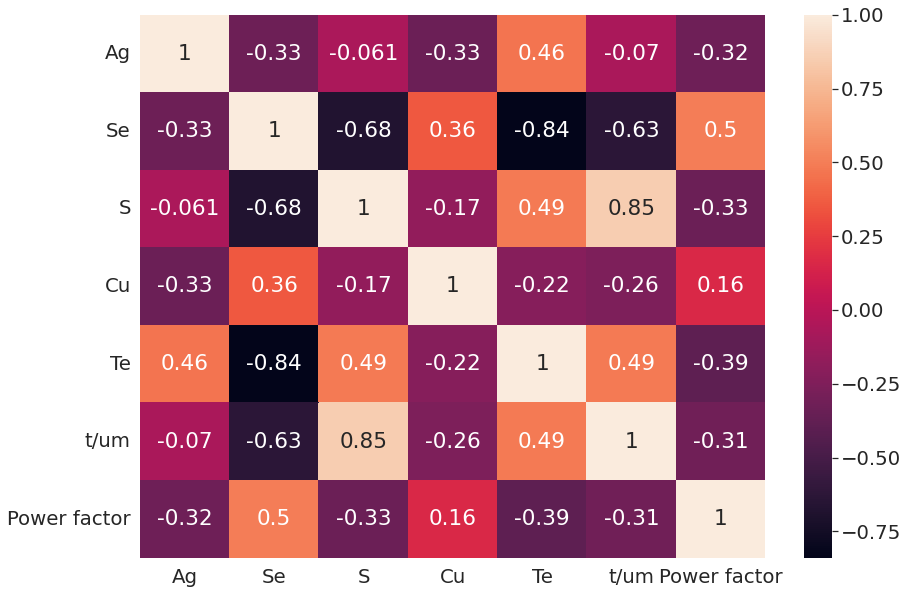

In [ ]:
corr = df.corr()
sns.set(font_scale=1.8)
# plot the heatmap
f, ax = plt.subplots(figsize=(14, 10))

ax = sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot= True)

In [ ]:
df = df.append([newdatadf, newdatadf2, newdatadf3, newdatadf4 , newdatadf5, newdatadf6, newdatadf7, newdatadf8])

In [ ]:
df

,Ag,Se,S,Cu,Te,t/um,Power factor
0,2.00,1.0,0.000,0.00,0.0,5.400,1882.0
1,1.70,1.0,0.000,0.00,0.0,0.910,885.0
2,1.80,1.0,0.000,0.00,0.0,0.980,2120.0
3,1.90,1.0,0.000,0.00,0.0,1.089,2330.0
4,2.00,1.0,0.000,0.00,0.0,0.955,2460.0
...,...,...,...,...,...,...,...
0,1.90,1.2,0.001,0.24,0.0,60.000,1165.0
1,1.90,1.2,0.001,0.24,0.0,85.000,929.0
2,1.90,1.2,0.001,0.24,0.0,88.000,860.0
0,1.90,1.1,0.005,0.08,0.0,80.000,1407.0


In [ ]:
X = np.array(df[df.columns[0:-1]])
y = np.array(df[df.columns[-1]]).reshape(-1,1)

In [ ]:
X_scaler = preprocessing.StandardScaler().fit(X)
X_scaled = X_scaler.transform(X)

y_scaler = preprocessing.StandardScaler().fit(y)
y_scaled = y_scaler.transform(y)

In [ ]:

index = np.random.permutation(len(y))
train_index = index[:int(0.8*len(y))]
test_index = index[int(0.8*len(y)):]

X_scaled_train,X_scaled_test = X_scaled[train_index],X_scaled[test_index]

y_scaled_train,y_scaled_test = y_scaled[train_index],y_scaled[test_index]

In [ ]:
print(X_scaled_test.shape)
print(X_scaled_train.shape)
print(y_scaled_test.shape)
print(y_scaled_train.shape)

(13, 6)
(52, 6)
(13, 1)
(52, 1)


In [ ]:
from sklearn.gaussian_process.kernels import Matern
'''kernel = ConstantKernel(constant_value = 1, constant_value_bounds=(0.01,5)) * RBF(length_scale=[0.5,2], length_scale_bounds=(0.3, 3)) \
    + WhiteKernel(noise_level=0.16**2, noise_level_bounds=(0.01,0.8))
'''

kernel = ConstantKernel(constant_value = 1, constant_value_bounds=(0.05,5)) *Matern(length_scale=[1,1,1,1,1,1], length_scale_bounds=[0.3,5], nu=2.5) \
    + WhiteKernel(noise_level=0.16**2, noise_level_bounds=(0.01,0.8))

#define GP model
kernel = ConstantKernel(constant_value = 1, constant_value_bounds=(0.05,5)) \
         *Matern(length_scale= np.random.uniform(0.3, 5, 6), length_scale_bounds=[0.3,5], nu=2.5) \
         + WhiteKernel(noise_level=0.16**2, noise_level_bounds=(0.01,0.8))
gpr = GaussianProcessRegressor(kernel=kernel,random_state=0, n_restarts_optimizer=100)
gpr.fit(X_scaled, y_scaled)

/usr/local/lib/python3.8/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.3. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 1 of parameter k1__k2__length_scale is close to the specified upper bound 5.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 2 of parameter k1__k2__length_scale is close to the specified upper bound 5.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWar

GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=[3.31, 4.22, 4.2, 0.811, 4.61, 0.686], nu=2.5) + WhiteKernel(noise_level=0.0256),
                         n_restarts_optimizer=100, random_state=0)

In [ ]:
gpr.kernel_

1.07**2 * Matern(length_scale=[0.3, 5, 5, 0.65, 0.344, 0.3], nu=2.5) + WhiteKernel(noise_level=0.126)

In [ ]:
#get mean, variance
y_scaled_train_mean, y_scaled_train_std = gpr.predict(X_scaled_train, return_std=True)
y_scaled_test_mean, y_scaled_test_std = gpr.predict(X_scaled_test, return_std=True)

In [ ]:
#inverse transform predicted result
y_train_mean = y_scaler.inverse_transform(y_scaled_train_mean)
y_train_std = np.sqrt(y_scaler.var_) * y_scaled_train_std.reshape(-1,1)
y_test_mean = y_scaler.inverse_transform(y_scaled_test_mean)
y_test_std = np.sqrt(y_scaler.var_) * y_scaled_test_std.reshape(-1,1)

#unormalized std = normalized std * y_scaler_sigma

In [ ]:
mean_test,cov_test = gpr.predict(X_scaled_test,return_cov=True)
text = 'R2 score:' + str(round(r2_score(y_scaled_test,mean_test), 2))

Text(700, 0, 'R2 score:0.88')

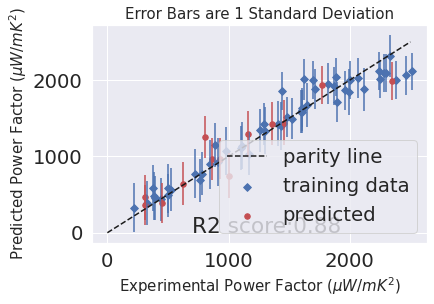

In [ ]:
plt.scatter(y[train_index], y_train_mean, 30, marker='D', label='training data')
plt.errorbar(y[train_index].reshape(-1), y_train_mean.reshape(-1), y_train_std.reshape(-1), fmt = ' ')

plt.scatter(y[test_index], y_test_mean, 30, c='r', marker='o', label='predicted')
plt.errorbar(y[test_index].reshape(-1), y_test_mean.reshape(-1), y_test_std.reshape(-1),c='r', fmt = ' ')

# for i in range(len(y[test_index])):
#     plt.annotate(str(round(np.max(calculate_rbf_distance(X_scaled[train_index], X_scaled[test_index][i:i+1])), 2)), xy=(np.array(y[test_index][i]), np.array(y_test_mean[i])))

plt.plot([0,2500],[0,2500],'k--', label='parity line')
plt.xlabel('Experimental Power Factor ($\mu W/mK^2$)',fontdict={'size':15})
plt.ylabel('Predicted Power Factor ($\mu W/mK^2$)', fontdict={'size':15})
plt.title('Error Bars are 1 Standard Deviation', fontdict={'size':15})
plt.grid(True)
plt.legend()
plt.text(700, 0, text)

1.03**2 * Matern(length_scale=[0.3, 5, 5, 5, 0.3, 0.3], nu=2.5) + WhiteKernel(noise_level=0.13)
1.03**2 * Matern(length_scale=[0.3, 5, 5, 5, 0.3, 0.3], nu=2.5) + WhiteKernel(noise_level=0.13)
1.03**2 * Matern(length_scale=[0.3, 5, 5, 5, 0.3, 0.3], nu=2.5) + WhiteKernel(noise_level=0.13)
1.03**2 * Matern(length_scale=[0.3, 5, 5, 5, 0.3, 0.3], nu=2.5) + WhiteKernel(noise_level=0.13)
1.03**2 * Matern(length_scale=[0.3, 5, 5, 5, 0.3, 0.3], nu=2.5) + WhiteKernel(noise_level=0.13)
1.03**2 * Matern(length_scale=[0.3, 5, 5, 5, 0.3, 0.3], nu=2.5) + WhiteKernel(noise_level=0.13)
1.03**2 * Matern(length_scale=[0.3, 5, 5, 5, 0.3, 0.3], nu=2.5) + WhiteKernel(noise_level=0.13)
1.03**2 * Matern(length_scale=[0.3, 5, 5, 5, 0.3, 0.3], nu=2.5) + WhiteKernel(noise_level=0.13)
1.03**2 * Matern(length_scale=[0.3, 5, 5, 5, 0.3, 0.3], nu=2.5) + WhiteKernel(noise_level=0.13)
1.03**2 * Matern(length_scale=[0.3, 5, 5, 5, 0.3, 0.3], nu=2.5) + WhiteKernel(noise_level=0.13)
1.03**2 * Matern(length_scale=[0.3, 5, 5

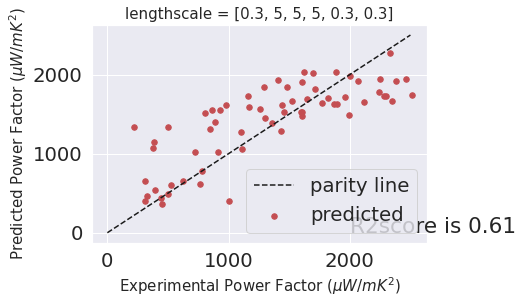

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold


kf = KFold(n_splits=len(X_scaled), shuffle=False)

result_cv = []

para_space = np.linspace(0.01,5,50)

xx, yy = np.meshgrid(para_space, para_space)


result = []
ytest = []
ytest_std = []
ypred = []
lml_list = []
predicting_prob = []
for train_index, test_index in kf.split(X_scaled):
    X_scaled_train_loocv,X_scaled_test_loocv = X_scaled[train_index],X_scaled[test_index]

    y_scaled_train_loocv,y_scaled_test_loocv = y_scaled[train_index],y_scaled[test_index]

#[0.3, 5, 0.3, 0.3, 5, 5, 2.22, 5]
#[2.07, 2.54, 1.5, 2.85, 0.682, 1.71, 1.58, 1.79]
#[0.3, 5, 5, 5, 0.3, 0.3]
#[0.3, 5, 5, 5, 1.09, 5]

#0.3,0.7,3.34,0.9,0.3,0.3]
#[0.3, 5, 5, 0.3, 0.3, 0.3]
#1.03**2 * Matern(length_scale=[0.3, 0.701, 3.34, 0.907, 0.3, 0.3], nu=2.5) + WhiteKernel(noise_level=0.127)

    def gp_with_sklearn(sigma_l=1,lengthscale=1000000,noise = 0.16**2):
        kernel = ConstantKernel(constant_value = 1.03**2, constant_value_bounds='fixed') \
                *Matern(length_scale=[0.3, 5, 5, 5, 0.3, 0.3], length_scale_bounds='fixed', nu=2.5) \
                + WhiteKernel(noise_level=0.13, noise_level_bounds='fixed')
        '''kernel = ConstantKernel(constant_value = 1,) *Matern(length_scale=[0.2,1], nu=1.5) \
            + WhiteKernel(noise_level=0.16**2, noise_level_bounds='fixed')'''
        gpr = GaussianProcessRegressor(kernel=kernel)

        X_1 = X_scaled_train_loocv
        X_2 = X_scaled_test_loocv
        y_1 = y_scaled_train_loocv
        y_2 = y_scaled_test_loocv

        gpr.fit(X_1, y_1)
        print(gpr.kernel_)
        mean_test,std_test = gpr.predict(X_2,return_std=True)
        mean_train,std_train = gpr.predict(X_1,return_std=True)
        LML = gpr.log_marginal_likelihood(gpr.kernel_.theta)
        return LML, mean_test,std_test,mean_train,std_train

    LML, mean_test, std_test, _, _ = gp_with_sklearn(lengthscale=0.3)
    #pred_prob = -0.5*np.log(cov_test)-((y_scaled_test_loocv-mean_test)**2)/(2*cov_test)-1/2*np.log(2*np.pi)
    #predicting_prob.append(pred_prob)
    ytest_std.append(std_test)
    ypred.append(mean_test)
    ytest.append(y_scaled_test_loocv)
    lml_list.append(LML)

    #R2score = r2_score(y_scaled_test_loocv,mean_test)
    #result.append([matrix_para, filler_para, LML, R2score])
R2score = r2_score(np.array(ytest).reshape(-1), np.array(ypred).reshape(-1))
#result.append([matrix_para, filler_para, np.array(lml_list).mean(), R2score, np.array(predicting_prob).sum()])

#result = np.array(result)

ytest = y_scaler.inverse_transform(np.array(ytest).squeeze(1))
ypred = y_scaler.inverse_transform(np.array(ypred).squeeze(1))
ytest_std = np.array(ytest_std) * np.sqrt(y_scaler.var_)

plt.scatter(ytest, ypred, 30, c='r', marker='o', label='predicted')
#plt.errorbar(ytest.reshape(-1), ypred.reshape(-1), ytest_std.reshape(-1),c='r', fmt = ' ')

plt.plot([0,2500],[0,2500],'k--', label='parity line')
plt.xlabel('Experimental Power Factor ($\mu W/mK^2$)',fontdict={'size':15})
plt.ylabel('Predicted Power Factor ($\mu W/mK^2$)', fontdict={'size':15})
plt.title(f'lengthscale = [0.3, 5, 5, 5, 0.3, 0.3]', fontdict={'size':15})
plt.grid(True)
plt.text(2000, 0, f'R2score is {R2score:.2f}')
plt.legend()

In [ ]:
import matplotlib.ticker as mtick
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [ ]:
Ag_range = np.arange(1.7,2.2,0.05) 
Se_range = np.arange(1.1,1.4,0.05) 
S_range = np.arange(0.0,0.02,0.005)
Cu_range = np.arange(0.0,0.28,0.01)
Te_range = np.arange(0,0.003,0.001)
thickness_range = np.arange(60,61,10)
#temperature_range = np.arange(300,301,1)
#time_range = np.arange(20,21,10)
Ag_grid, Se_grid, S_grid, Cu_grid, Te_grid, thickness_grid = np.meshgrid(Ag_range, Se_range, S_range, Cu_range, Te_range, thickness_range, )
X_all = np.concatenate((Ag_grid.reshape(-1,1), Se_grid.reshape(-1,1), S_grid.reshape(-1,1), Cu_grid.reshape(-1,1), Te_grid.reshape(-1,1), thickness_grid.reshape(-1,1),),axis=1)
X_all = X_scaler.transform(X_all)
mean_all,mean_std = gpr.predict(X_all,return_std=True)
plt.figure()
plt.plot(y_scaler.inverse_transform(mean_all))
plt.xlabel('index of data points')
plt.ylabel('PF prediction mean')
plt.figure()
plt.plot(mean_std * np.sqrt(y_scaler.var_))
plt.xlabel('index of data points')
plt.ylabel('PF prediction STD')
acq_value = acquisition_EI(X_all, y_scaled, gpr)
# largest_index = np.flip(np.argsort(acq_value,axis=0))[:10]
plt.figure()
largest_index = np.flip(np.argsort(acq_value,axis=0)).reshape(-1)
BOdatapoints = largest_index[::3][:50]
plt.plot(acq_value)
plt.xlabel('Index of data points')
plt.ylabel('Acquisition function value')
plt.grid()

plt.scatter(BOdatapoints[:50], acq_value[BOdatapoints[:50]], c = 'red', label = 'BO suggestion')
plt.legend()
bosuggestionsdf = pd.DataFrame(X_scaler.inverse_transform(X_all[BOdatapoints]))
namelist= ['Ag', 'Se', 'S', 'Cu', 'Te', 'thickness']
bosuggestionsdf.columns = namelist
bosuggestionsdf['predictedPF']=y_scaler.inverse_transform(gpr.predict(X_all[BOdatapoints]))
print(bosuggestionsdf)
'''for i in range(500):

    plt.annotate(f'{i}', xy=(BOdatapoints[i], acq_value[BOdatapoints[i]]))'''


In [ ]:
Ag_range = np.arange(1.7,2.2,0.05) 
Se_range = np.arange(1.1,1.4,0.05) 
S_range = np.arange(1.5e-2,0.02,0.005)
Cu_range = np.arange(0.16,0.28,0.01)
Te_range = np.arange(2e-3,0.003,0.001)
thickness_range = np.arange(60,61,10)
#temperature_range = np.arange(300,301,1)
#time_range = np.arange(20,21,10)
Ag_grid, Se_grid, S_grid, Cu_grid, Te_grid, thickness_grid = np.meshgrid(Ag_range, Se_range, S_range, Cu_range, Te_range, thickness_range, )

X_all = np.concatenate((Ag_grid.reshape(-1,1), Se_grid.reshape(-1,1), S_grid.reshape(-1,1), Cu_grid.reshape(-1,1), Te_grid.reshape(-1,1), thickness_grid.reshape(-1,1),),axis=1)
X_all = X_scaler.transform(X_all)

#[0.3,0.7,3.34,0.9,0.3,0.3]
#[0.3, 3.75, 5, 5, 0.3, 0.41]
"""
kernel = ConstantKernel(constant_value = 1, constant_value_bounds='fixed') *Matern(length_scale=[0.3, 5, 5, 5, 0.3, 0.3], length_scale_bounds='fixed', nu=2.5) \
            + WhiteKernel(noise_level=0.2, noise_level_bounds='fixed')
"""
kernel = ConstantKernel(constant_value = 1, constant_value_bounds='fixed') *Matern(length_scale=[0.3, 5, 5, 3, 0.3, 0.3], length_scale_bounds='fixed', nu=2.5) \
            + WhiteKernel(noise_level=0.2, noise_level_bounds='fixed')

gpr = GaussianProcessRegressor(kernel=kernel)
gpr.fit(X_scaled, y_scaled)
LML = gpr.log_marginal_likelihood(gpr.kernel_.theta)

In [ ]:
mean_all,mean_std = gpr.predict(X_all,return_std=True)

Text(0, 0.5, 'PF prediction mean')

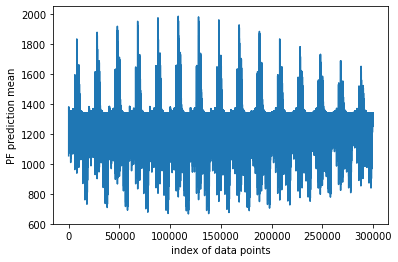

In [ ]:
plt.plot(y_scaler.inverse_transform(mean_all))
plt.xlabel('index of data points')
plt.ylabel('PF prediction mean')

Text(0, 0.5, 'PF prediction STD')

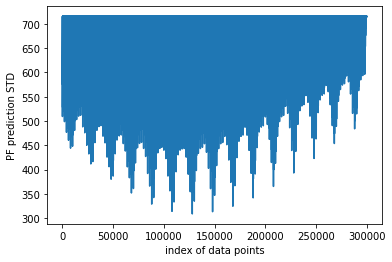

In [ ]:
plt.plot(mean_std * np.sqrt(y_scaler.var_))
plt.xlabel('index of data points')
plt.ylabel('PF prediction STD')

In [ ]:
acq_value = acquisition_EI(X_all, y_scaled, gpr)
# largest_index = np.flip(np.argsort(acq_value,axis=0))[:10]

"for i in range(500):\n\n    plt.annotate(f'{i}', xy=(BOdatapoints[i], acq_value[BOdatapoints[i]]))"

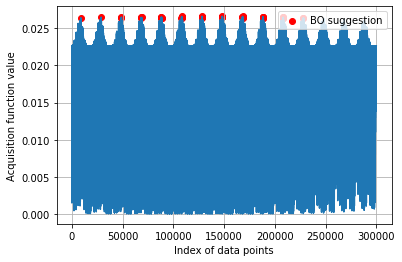

In [ ]:
plt.plot(acq_value)
plt.xlabel('Index of data points')
plt.ylabel('Acquisition function value')
plt.grid()

plt.scatter(BOdatapoints[:50], acq_value[BOdatapoints[:50]], c = 'red', label = 'BO suggestion')
plt.legend()
'''for i in range(500):

    plt.annotate(f'{i}', xy=(BOdatapoints[i], acq_value[BOdatapoints[i]]))'''

In [ ]:
largest_index = np.flip(np.argsort(acq_value,axis=0)).reshape(-1)

In [ ]:
largest_index

array([  8011,  28011,   8211, ..., 134000, 116000, 114000])

In [ ]:
namelist= ['Ag', 'Se', 'S', 'Cu', 'Te', 'thickness']

In [ ]:
bosuggestionsdf.columns = namelist

In [ ]:
bosuggestionsdf['predictedPF']=y_scaler.inverse_transform(gpr.predict(X_all[BOdatapoints]))
bosuggestionsdf['predictedSTD']=np.sqrt(y_scaler.var_)*gpr.predict(X_all[BOdatapoints], return_std=True)[1]
bosuggestionsdf['EI'] = acq_value[BOdatapoints]

In [ ]:
bodft60 = bosuggestionsdf

In [ ]:
bodft60

,Ag,Se,S,Cu,Te,thickness,predictedPF,predictedSTD,EI
0,1.85,1.10,1.500000e-02,0.19,0.002,60.0,1730.436137,341.977566,0.001881
1,1.85,1.10,1.000000e-02,0.19,0.002,60.0,1728.878709,341.743767,0.001846
2,1.85,1.10,5.000000e-03,0.19,0.002,60.0,1727.118196,341.768754,0.001819
3,1.85,1.10,-3.469447e-18,0.19,0.002,60.0,1725.156191,342.052750,0.001800
4,1.80,1.10,1.500000e-02,0.19,0.002,60.0,1612.119799,383.968548,0.001787
5,1.80,1.10,1.000000e-02,0.19,0.002,60.0,1610.571919,383.747554,0.001758
6,1.80,1.10,5.000000e-03,0.19,0.002,60.0,1608.891397,383.725575,0.001734
7,1.85,1.10,1.500000e-02,0.19,0.001,60.0,1722.616595,341.059128,0.001722
8,1.80,1.10,-3.469447e-18,0.19,0.002,60.0,1607.079770,383.902856,0.001716
9,1.85,1.10,1.000000e-02,0.19,0.001,60.0,1721.079899,340.760585,0.001687
